# CHN Hackathon Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [17]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [18]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [19]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [28]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data


# p_factor: how much pathology the participant has. predict p_factor based on the other columns

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN


## Project Goal: Predict the `p_factor`

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

### Step 1. Collect Data

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [20]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [21]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

print(data.columns.tolist()) 

['subject_id', 'session_id', 'atlas', 'hemisphere', 'StructName', 'NumVert', 'SurfArea', 'GrayVol', 'ThickAvg', 'ThickStd', 'MeanCurv', 'GausCurv', 'FoldInd', 'CurvInd', 'Index', 'SegId', 'Mean_wgpct', 'StdDev_wgpct', 'Min_wgpct', 'Max_wgpct', 'Range_wgpct', 'SNR_wgpct', 'Mean_piallgi', 'StdDev_piallgi', 'Min_piallgi', 'Max_piallgi', 'Range_piallgi']


In [33]:
data = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
data = data.dropna(axis=1, how="all")

In [35]:
# =========================================================
# Build participant-level summaries for baseline model
# =========================================================
import numpy as np
import pandas as pd
from ipywidgets import IntProgress
import gc

print("Building participant-level summaries for baseline model...")

all_summaries = []

# Create and display a progress bar
prog = IntProgress(min=0, max=len(all_data))
display(prog)

for ii, row in all_data.iterrows():
    participant_id = row["participant_id"]
    p_factor = row["p_factor"]

    try:
        # Load each participant's morphometric TSV file
        df = load_fsdata(participant_id).drop(
            columns=["subject_id", "session_id"], errors="ignore"
        )

        # All numeric columns from your dataset
        numeric_cols = [
            "NumVert", "SurfArea", "GrayVol", "ThickAvg",
            "MeanCurv", 
            "Mean_wgpct",
            "Mean_piallgi",
        ]

        # Convert to numeric and compute mean/std for each participant
        df = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
        summary = df.mean().add_suffix("_mean").to_dict()
        summary.update(df.std().add_suffix("_std").to_dict())

        # Add participant metadata
        summary["participant_id"] = participant_id
        summary["p_factor"] = p_factor

        all_summaries.append(summary)

    except FileNotFoundError:
        print(f"Missing file for participant {participant_id}, skipping.")
    except Exception as e:
        print(f"Error processing {participant_id}: {e}")

    prog.value += 1

    if ii % 50 == 0:
        gc.collect()
        print(f"{ii} participants processed...")

# After loop ends
summary_df = pd.DataFrame(all_summaries)
train_vars = summary_df[~np.isnan(summary_df["p_factor"])]
test_vars = summary_df[np.isnan(summary_df["p_factor"])]

print(f"✅ Generated {len(summary_df)} participant summaries "
      f"({len(train_vars)} train, {len(test_vars)} test).")

summary_df.to_csv("baseline_input.csv", index=False)
print("Saved compact dataset to baseline_input.csv")


Building participant-level summaries for baseline model...


IntProgress(value=0, max=1601)

0 participants processed...
50 participants processed...
Missing file for participant 1342487188, skipping.
100 participants processed...
150 participants processed...
Missing file for participant 1649551035, skipping.
200 participants processed...
250 participants processed...
Missing file for participant 2003542642, skipping.
300 participants processed...
Missing file for participant 219325366, skipping.
Missing file for participant 2249226316, skipping.
350 participants processed...
400 participants processed...
450 participants processed...
500 participants processed...
550 participants processed...
600 participants processed...
650 participants processed...
700 participants processed...
750 participants processed...
800 participants processed...
850 participants processed...
Missing file for participant 4184549693, skipping.
900 participants processed...
Missing file for participant 495793681, skipping.
950 participants processed...
1000 participants processed...
1050 participants

In [39]:
summary_df.head()

,NumVert_mean,SurfArea_mean,GrayVol_mean,ThickAvg_mean,MeanCurv_mean,Mean_wgpct_mean,Mean_piallgi_mean,NumVert_std,SurfArea_std,GrayVol_std,ThickAvg_std,MeanCurv_std,Mean_wgpct_std,Mean_piallgi_std,participant_id,p_factor
0,676.056550,452.722489,1286.092358,2.675004,0.129241,20.682546,3.204107,1260.947284,839.331046,2294.744060,0.473010,0.024389,3.711939,0.768107,1000393599,0.589907
1,651.457906,421.090592,1165.140581,2.585900,0.124559,21.596860,3.173422,1204.697715,781.918611,2091.096539,0.461140,0.024757,3.708439,0.778392,1001970838,-0.659061
2,633.265303,421.712206,1251.732440,2.719544,0.125397,21.923082,3.342269,1162.842935,773.331639,2243.095783,0.469726,0.025692,3.800072,0.806791,1007995238,-1.608375
3,650.525657,434.016013,1273.146808,2.688756,0.124865,20.537087,3.298784,1215.144381,808.914437,2270.586821,0.479029,0.026498,3.648080,0.755040,1011497669,-1.233807
4,621.995779,416.813346,1151.669335,2.597080,0.127306,20.347297,3.124653,1169.214769,778.168670,2045.308220,0.478362,0.026065,3.245890,0.726105,1017092387,-0.923100


To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

Based on the above workflow, we can now write a function that extracts the BA1
surface area for a participant.

Let's test this function:

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

### Step 2. Train the Linear Regression

To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

🚀 Starting baseline model training with train/test split...
✅ Clean data ready: 1047 samples × 7 features
🔹 Training set: 837 samples
🔹 Testing set:  210 samples

🧮 Linear Regression Results:
Train R²: 0.06401650071239695
Test  R²: 0.05301679682928617
Test  RMSE: 0.9287133618816324
Intercept: 4.506072209098605

Coefficients:
NumVert_mean         -> 0.0011
SurfArea_mean        -> -0.0004
GrayVol_mean         -> -0.0004
ThickAvg_mean        -> -1.2053
MeanCurv_mean        -> 5.4331
Mean_wgpct_mean      -> 0.0670
Mean_piallgi_mean    -> -1.2110

🌲 Random Forest Results:
Train R²: 0.8592551263531008
Test  R²: -0.013048691876375695
Test  RMSE: 0.9605626950081857


/tmp/ipykernel_10354/3163160070.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


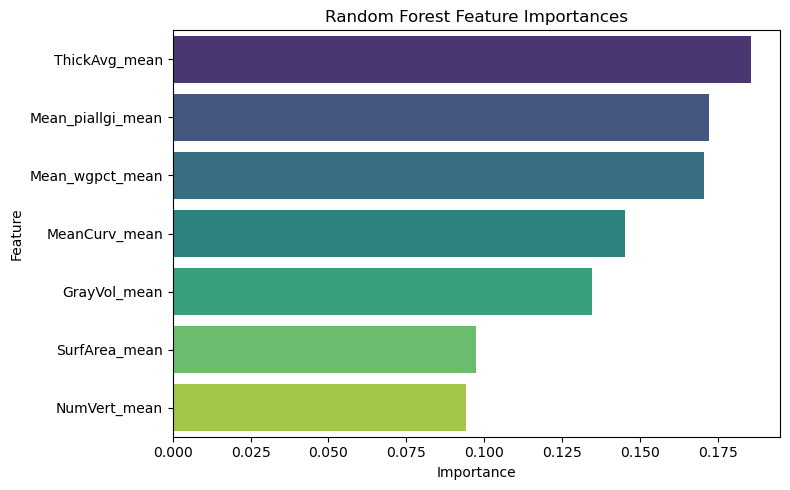


Top Feature Importances:
             Feature  Importance
3      ThickAvg_mean    0.185725
6  Mean_piallgi_mean    0.172249
5    Mean_wgpct_mean    0.170582
4      MeanCurv_mean    0.145368
2       GrayVol_mean    0.134696
1      SurfArea_mean    0.097255
0       NumVert_mean    0.094126


In [43]:
# =========================================================
# Baseline Model with Train/Test Split
# =========================================================
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Silence harmless warnings
warnings.filterwarnings("ignore", message="invalid value encountered")

print("🚀 Starting baseline model training with train/test split...")

# =========================================================
# Load summarized dataset
# =========================================================
# If already in memory, skip this line:
# summary_df = pd.read_csv("baseline_input.csv")

# Keep only participants with known p_factor
train_vars = summary_df[~np.isnan(summary_df["p_factor"])]

# =========================================================
# Select features for the baseline model
# =========================================================
feature_cols = [
    "NumVert_mean",
    "SurfArea_mean",
    "GrayVol_mean",
    "ThickAvg_mean",
    "MeanCurv_mean",
    "Mean_wgpct_mean",
    "Mean_piallgi_mean"
]

# Prepare feature (X) and target (y) matrices
X = train_vars[feature_cols].values
y = train_vars["p_factor"].values

# Remove rows with missing values
mask = np.all(~np.isnan(X), axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

print(f"✅ Clean data ready: {X.shape[0]} samples × {X.shape[1]} features")

# =========================================================
# Split into training and testing sets
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"🔹 Training set: {X_train.shape[0]} samples")
print(f"🔹 Testing set:  {X_test.shape[0]} samples")

# =========================================================
# Linear Regression
# =========================================================
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred_train = lreg.predict(X_train)
y_pred_test = lreg.predict(X_test)

print("\n🧮 Linear Regression Results:")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test  R²:", r2_score(y_test, y_pred_test))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Intercept:", lreg.intercept_)

print("\nCoefficients:")
for name, coef in zip(feature_cols, lreg.coef_):
    print(f"{name:20s} -> {coef:.4f}")

# =========================================================
# Random Forest Regression
# =========================================================
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print("\n🌲 Random Forest Results:")
print("Train R²:", r2_score(y_train, y_pred_train_rf))
print("Test  R²:", r2_score(y_test, y_pred_test_rf))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))

# =========================================================
# Feature Importances Visualization
# =========================================================
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

print("\nTop Feature Importances:")
print(importance_df)



### Step 3. Predict the `p_factor` of the Test Data

In [45]:
# =========================================================
# Predict p_factor for unseen participants using Linear regression
# =========================================================

# Make sure we use the same feature columns as during training
feature_cols = [
    "NumVert_mean",
    "SurfArea_mean",
    "GrayVol_mean",
    "ThickAvg_mean",
    "MeanCurv_mean",
    "Mean_wgpct_mean",
    "Mean_piallgi_mean"
]

# Extract only those columns
test_matrix = test_vars[feature_cols].values

# Remove any rows with missing values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the trained model to predict p_factor
p_factor_predictions = lreg.predict(test_matrix)

# Store predictions in a new column
test_vars = test_vars.copy()
test_vars.loc[test_okrows, "p_factor_pred"] = p_factor_predictions

# Display the first few predictions
print(test_vars[["participant_id", "p_factor_pred"]].head())

# (Optional) save results for submission
test_vars.to_csv("p_factor_predictions.csv", index=False)
print("✅ Saved predicted p_factors to p_factor_predictions.csv")


      participant_id  p_factor_pred
1060      1000881804      -0.432629
1061       100527940      -0.825347
1062      1006151876       0.100900
1063      1012530688      -0.548140
1064      1030193285      -0.509553
✅ Saved predicted p_factors to p_factor_predictions.csv


In [46]:
# =========================================================
# Predict p_factor for unseen participants using Random Forest
# =========================================================

# Ensure same features used during training
feature_cols = [
    "NumVert_mean",
    "SurfArea_mean",
    "GrayVol_mean",
    "ThickAvg_mean",
    "MeanCurv_mean",
    "Mean_wgpct_mean",
    "Mean_piallgi_mean"
]

# Extract features from test data
test_matrix = test_vars[feature_cols].values

# Drop rows with missing values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# ✅ Predict p_factor using Random Forest model
p_factor_predictions = rf.predict(test_matrix)

# Store predictions in test_vars
test_vars = test_vars.copy()
test_vars.loc[test_okrows, "p_factor_pred"] = p_factor_predictions

# Preview a few results
print("\n🌲 Random Forest Predictions for Test Participants:")
print(test_vars[["participant_id", "p_factor_pred"]].head())

# Save results
test_vars.to_csv("p_factor_predictions_rf.csv", index=False)
print("✅ Saved Random Forest predictions to p_factor_predictions_rf.csv")




🌲 Random Forest Predictions for Test Participants:
      participant_id  p_factor_pred
1060      1000881804      -0.411423
1061       100527940      -0.947705
1062      1006151876      -0.076510
1063      1012530688      -0.516228
1064      1030193285      -0.327225
✅ Saved Random Forest predictions to p_factor_predictions_rf.csv


### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [16]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor
0,1000881804,PNC,PNC1,PNC1,1,14.916667,Male,Black,not Hispanic or Latino,21.52,Right,7th Grade,Complete secondary,Complete secondary,-0.429863
1,100527940,PNC,PNC1,PNC1,1,8.250000,Male,Black,not Hispanic or Latino,NaN,Ambidextrous,1st Grade,Complete secondary,Complete primary,-0.416456
2,1006151876,PNC,PNC1,PNC1,1,21.500000,Female,Other,not Hispanic or Latino,NaN,Right,12th Grade,Complete tertiary,Complete secondary,-0.309821
3,1012530688,PNC,PNC1,PNC1,1,8.750000,Male,Black,not Hispanic or Latino,21.36,Right,2nd Grade,Complete tertiary,Complete secondary,-0.666207
4,1030193285,PNC,PNC1,PNC1,1,18.000000,Male,White,not Hispanic or Latino,22.15,Right,10th Grade,Complete secondary,Complete primary,-0.292984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,-0.532445
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,-0.267104
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,-0.462914
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,-0.467279


We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

Once the tsv file has been saved, you can download it through the JupyterHub interface and send it to us! (We will probide an upload form.)